<a href="https://colab.research.google.com/github/abhishek-srivathsa/Sound_Classification_using_CNN/blob/main/Copy_of_sound_classification(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:


import os
import librosa
import librosa.display
import glob 
import skimage

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
df = pd.read_csv("UrbanSound8K.csv")



df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/fold/fold5/100032-3-0-0.wav')
dat2, sampling_rate2 = librosa.load('/content/drive/MyDrive/fold/fold5/100263-2-0-117.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

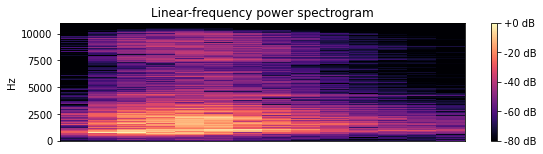

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

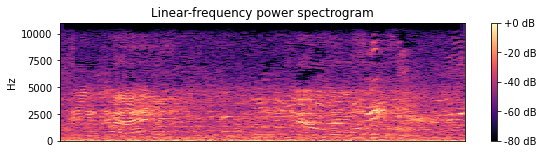

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

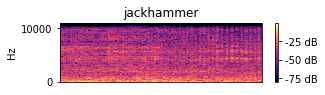

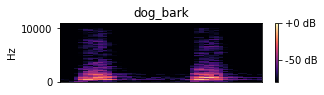

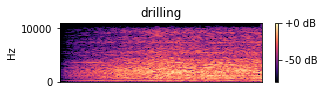

In [ ]:

arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = '/content/drive/MyDrive/fold/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [ ]:


dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/fold/fold5/100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 14)

In [ ]:
feature = []
label = []

def parser(row):
    
    for i in range(8732):
        file_name = '/content/drive/MyDrive/fold/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]

        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [ ]:
temp = parser(df)


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


In [ ]:
temp = np.array(temp)
data = temp.transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [ ]:
for i in range(8732):
    X[i] = (X_[i])

In [ ]:
Y = to_categorical(Y)

In [ ]:

print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [ ]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [ ]:
input_dim = (16, 8, 1)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 90, batch_size = 50, validation_data = (X_test, Y_test))

Epoch 1/90
131/131 [==============================] - 8s 49ms/step - loss: 1.5430 - accuracy: 0.4718 - val_loss: 1.2903 - val_accuracy: 0.5433
Epoch 2/90
131/131 [==============================] - 6s 47ms/step - loss: 1.1266 - accuracy: 0.6233 - val_loss: 1.1393 - val_accuracy: 0.6093
Epoch 3/90
131/131 [==============================] - 6s 47ms/step - loss: 0.9779 - accuracy: 0.6737 - val_loss: 1.0366 - val_accuracy: 0.6587
Epoch 4/90
131/131 [==============================] - 6s 47ms/step - loss: 0.8413 - accuracy: 0.7189 - val_loss: 0.9973 - val_accuracy: 0.6885
Epoch 5/90
131/131 [==============================] - 6s 47ms/step - loss: 0.7577 - accuracy: 0.7456 - val_loss: 0.9791 - val_accuracy: 0.6954
Epoch 6/90
131/131 [==============================] - 6s 47ms/step - loss: 0.6945 - accuracy: 0.7629 - val_loss: 0.8254 - val_accuracy: 0.7343
Epoch 7/90
131/131 [==============================] - 6s 47ms/step - loss: 0.6414 - accuracy: 0.7873 - val_loss: 0.9321 - val_accuracy: 0.7352

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 128)         0         
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

69/69 [==============================] - 1s 10ms/step - loss: 0.8474 - accuracy: 0.8639
[0.8474400043487549, 0.8639487028121948]


In [ ]:
preds = np.argmax(predictions, axis = 1)

In [ ]:
result = pd.DataFrame(preds)
result.to_csv("UrbanSound8kResults.csv")